In [1]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2

from qiskit_aer import AerSimulator

from qiskit import QuantumCircuit, QuantumRegister

import matplotlib.pyplot as plt

In [15]:
def runAndShow(qc: QuantumCircuit, noisy=True, shots = 1024):
    backend = FakeManilaV2() if noisy else AerSimulator()

    # You can use a fixed seed to get fixed results.
    result = SamplerV2(backend).run([
        generate_preset_pass_manager(backend=backend, optimization_level=0)
            .run(qc)
    ], shots=shots).result()

    retDict = result[0].data.meas.get_counts()
    # print(retDict)
    retDict = { k:retDict[k]/shots for k in sorted(retDict) }
    return plt.bar(retDict.keys(), retDict.values())

Text(0.5, 1.0, 'Backend topology')

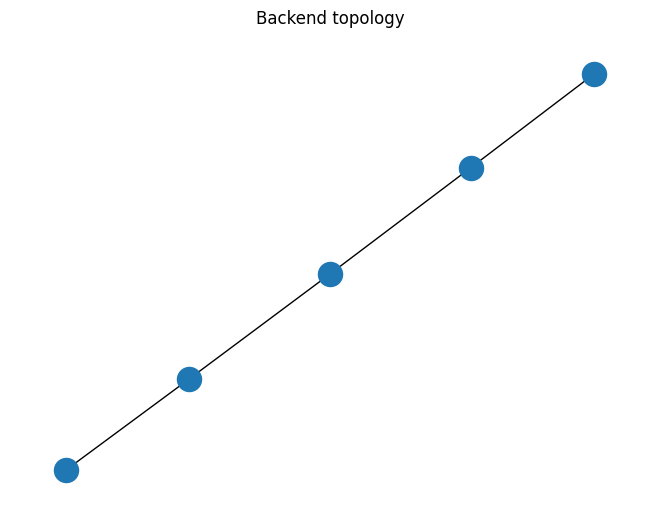

In [16]:
import networkx as nx

G = nx.Graph()
for edge in FakeManilaV2().coupling_map:
    G.add_edge(edge[0], edge[1])

nx.draw(G)
plt.title('Backend topology')

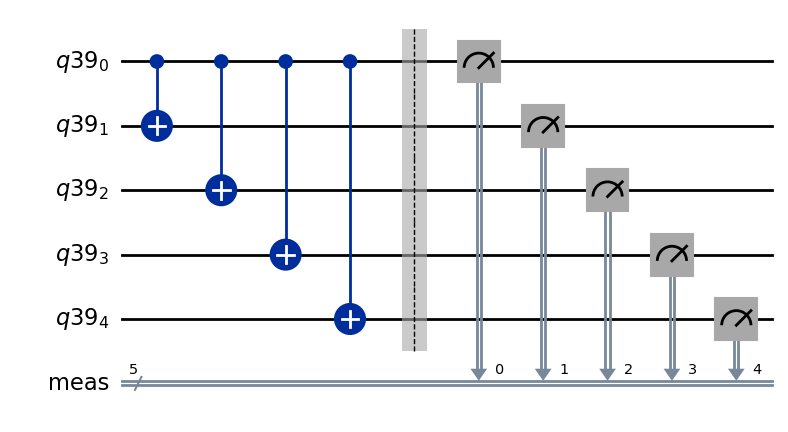

In [23]:
def getQC_TopologyTest(nQubits):
    qc = QuantumCircuit(QuantumRegister(nQubits))

    for i in range(1, nQubits):
        qc.cx(0, i)

    qc.measure_all()

    return qc

qc = getQC_TopologyTest(5)
qc.draw('mpl')

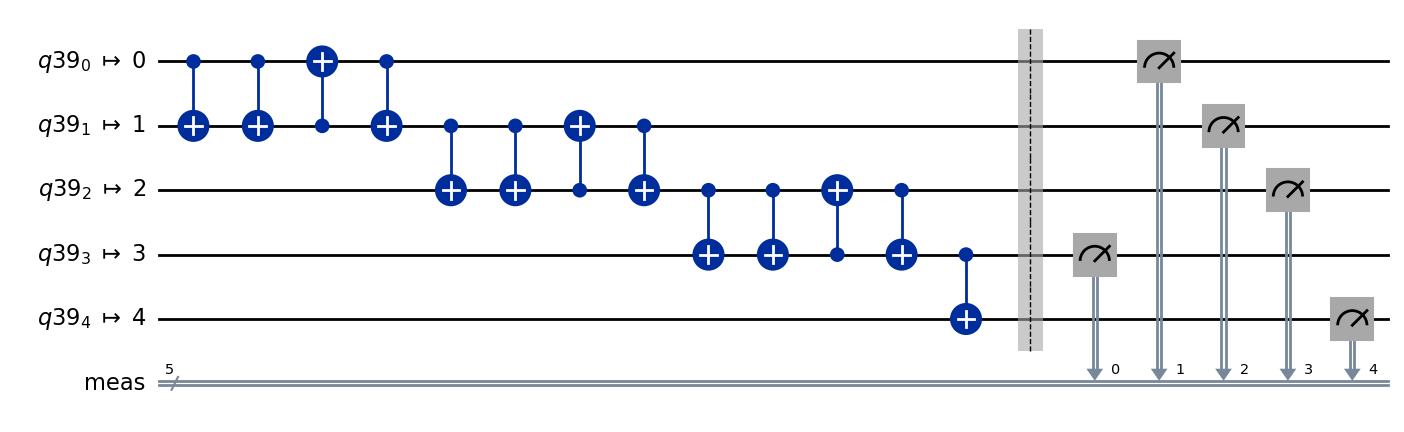

In [24]:
generate_preset_pass_manager(backend=FakeManilaV2(), optimization_level=0).run(qc).draw('mpl')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '00000'),
  Text(1, 0, '00001'),
  Text(2, 0, '00010'),
  Text(3, 0, '00011'),
  Text(4, 0, '00100'),
  Text(5, 0, '00101'),
  Text(6, 0, '00110'),
  Text(7, 0, '01000'),
  Text(8, 0, '01001'),
  Text(9, 0, '01010'),
  Text(10, 0, '01101'),
  Text(11, 0, '10000'),
  Text(12, 0, '10001'),
  Text(13, 0, '10101'),
  Text(14, 0, '11000'),
  Text(15, 0, '11001'),
  Text(16, 0, '11101'),
  Text(17, 0, '11111')])

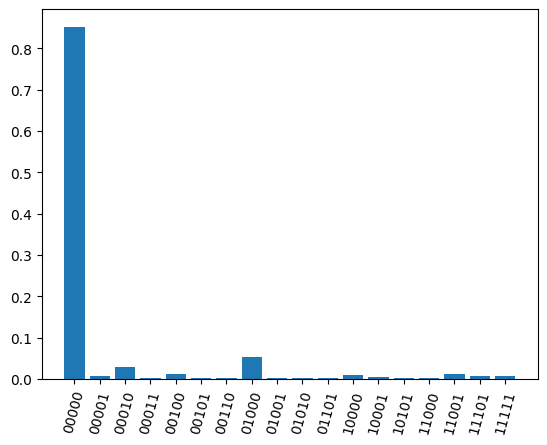

In [18]:
runAndShow(qc)
plt.xticks(rotation=75)

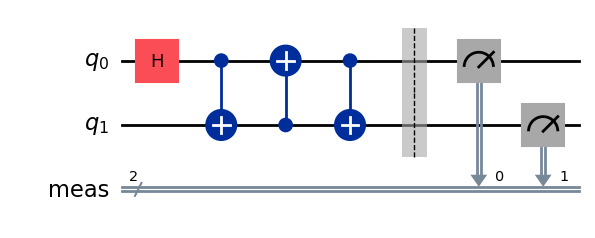

In [5]:
def getQC_SWAP():
    qc = QuantumCircuit(2)
    qc.h(0)

    qc.cx(0, 1)
    qc.cx(1, 0)
    qc.cx(0, 1)
    qc.measure_all()
    return qc

qc = getQC_SWAP()
qc.draw('mpl')

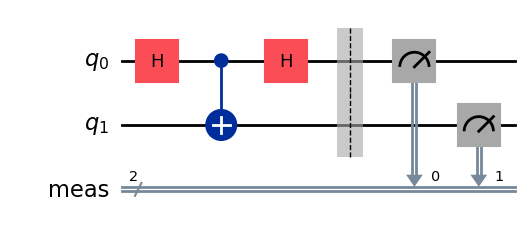

In [6]:
def getQC():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.h(0)

    qc.measure_all()
    return qc

qc = getQC()
qc.draw('mpl')

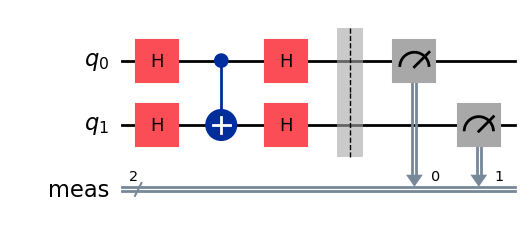

In [7]:
def getQC_revCNOT():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    qc.cx(0, 1)
    qc.h(0)
    qc.h(1)

    qc.measure_all()
    return qc

qc = getQC_revCNOT()
qc.draw('mpl')

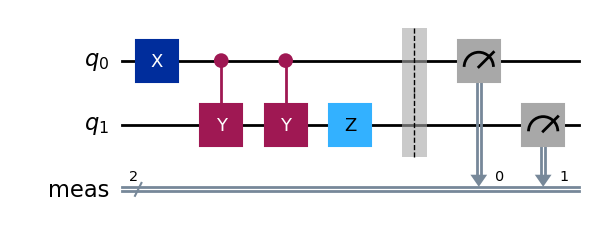

In [8]:
def getQC_testCY():
    qc = QuantumCircuit(2)
    qc.x(0)
    
    qc.cy(0, 1)
    qc.cy(0, 1)
    qc.z(1)


    qc.measure_all()
    return qc

qc = getQC_testCY()
qc.draw('mpl')

{'01': 923, '11': 17, '00': 76, '10': 8}


<BarContainer object of 4 artists>

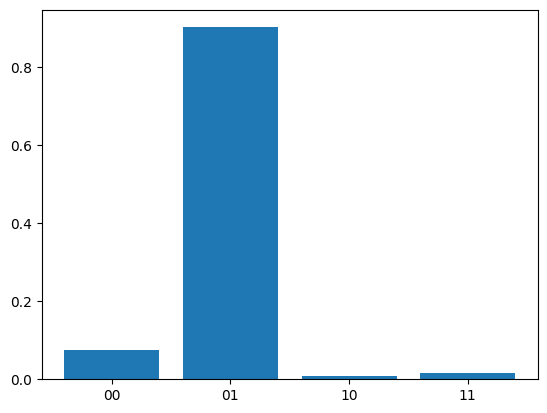

In [9]:
runAndShow(qc)